# scikit-image Functions

## Group 1 - Ocular Imaging

This notebook features the final iteration of the scikit-image class capable of analysing an image of a retina. The primary  functions are the maping out of the capillaries in the eye and the location of the fovea, the dark spot roughly at the centre of the retina where visual acuity is highest [1]. For more information about the tools used here, the scikit-image website features a page detailing the different image processing tools avaliable:

https://scikit-image.org/docs/stable/auto_examples/

In [1]:
# IMPORT APPROPRIATE MODULES #
import numpy as np
import matplotlib.pyplot as plt
import os

# SCIKIT-IMAGE #
import skimage
from skimage import data, measure, filters, io
from skimage.color import rgb2gray
from skimage.feature import blob_doh

## scikit-image Class

In [2]:
class scikit_analysis:
    '''
    Retina analysis tool taking advantage of the tools in the scikit-image library.
    Initial inputs:
        -  retina: NumPy array for image of retina (array)
        -  save_plot (optional)
    '''
    def __init__(self, retina, save_plot=False):
        
        retina_bw = rgb2gray(retina) # Convert photo to B&W
        
        # GLOBALISE VARIABLES WITHIN OBJECT #
        self.retina = retina
        self.retina_bw = retina_bw
        self.save_plot = save_plot

        
    def draw_contours(self, level=0.35, figname=False):
        '''
        Function to draw contours around capillaries of the eye.
        Inputs:
            - level (optional): Sensitivity of function to contours found in image, default is 0.35 (float)
            - figname (optional): name of figure if save_plot option is selected (string)
        Outputs:
            - retina_contours: array for contours along with plot 
        '''
        retina_contours = measure.find_contours(self.retina_bw, level, fully_connected='high') # find contours
        
        plt.imshow(self.retina)
        plt.axis('off')
        plt.title('Contours of capillaries visible in the retina')
        
        for contour in retina_contours:
            if len(contour) > len(self.retina_bw)*0.2: # filter out smaller contours
                plt.plot(contour[:, 1], contour[:, 0], linewidth=2) # plot contours
        
        # SAVE PLOT OR SHOW DEPENDING ON USER CHOICE #
        if self.save_plot == True:
            plt.savefig(figname)
            plt.close()
        else:
            plt.show()
        
        return retina_contours
    
    
    def fovea_detect(self, max_sigma=250, threshold=0.001, figname=False):
        
        '''
        Function to detect the fovea using the DoH method.
        Inputs:
            - max_sigma (optional): Max standard deviation for blob_doh() function, default is 250 (float)
            - threshold (optional): Sensitivity of blob_doh() to a blob's intensity, default is 0.001 (float)
            - figname (optional): name of figure if save_plot option is selected (string)
        Outputs:
            - foeva_pos: array for position of fovea and its sigma (rough radius of blob) value (array)
        '''
        fovea_blobs = blob_doh(self.retina_bw, max_sigma=max_sigma, threshold=threshold) # perform detection with B&W retina 
    
        retina_shape = np.shape(self.retina_bw) # resolution of retina photo
        mid = [int(retina_shape[0]/2),int(retina_shape[1]/2)] # midpoint of the photo
        inside_blob = [] # empty array for selected blobs

        # REMOVE BLOBS DETECTED OUTSIDE OF RETINA #
        for blob in fovea_blobs:
            mid_dis = np.sqrt((blob[0]-mid[0])**2 + (blob[1]-mid[1])**2) # calculate distance from centre
            
            if mid_dis < min(mid): # only select blobs inside retina
                inside_blob.append(blob)

        inside_blob = np.array(inside_blob) # turn standard array into numpy array for easier use
        brightness = np.zeros(len(inside_blob)) # empty array

        # FIND BRIGHTNESS AT EVERY SELECTED BLOB #
        for i in range(len(inside_blob)):
            brightness[i] = self.retina_bw[int(inside_blob[i,0]),int(inside_blob[i,1])]
        
        # PICKOUT SPOT OF MINIMUM BRIGHTNESS # 
        fovea_array_pos = np.argmin(brightness)
        fovea_pos = [inside_blob[fovea_array_pos,1],inside_blob[fovea_array_pos,0],inside_blob[fovea_array_pos,2]]

        # PLOT FOVEA ON RETINA #
        plt.imshow(self.retina) # plot retina photo
        plt.scatter(fovea_pos[0],fovea_pos[1],marker='x') # plot scatter showing detected spot
        plt.axis('off')
        plt.title('Detection of fovea using DoH method')
        
        # SAVE PLOT OR SHOW DEPENDING ON USER CHOICE #
        if self.save_plot == True:
            plt.savefig(figname)
            plt.close()
        else:
            plt.show()
            
        return fovea_pos

## Test on evaulation dataset 

The images this notebook will be tested on is the dataset obtained by Bohdan Glisevic. Six photos have been selected of varying difficulty.

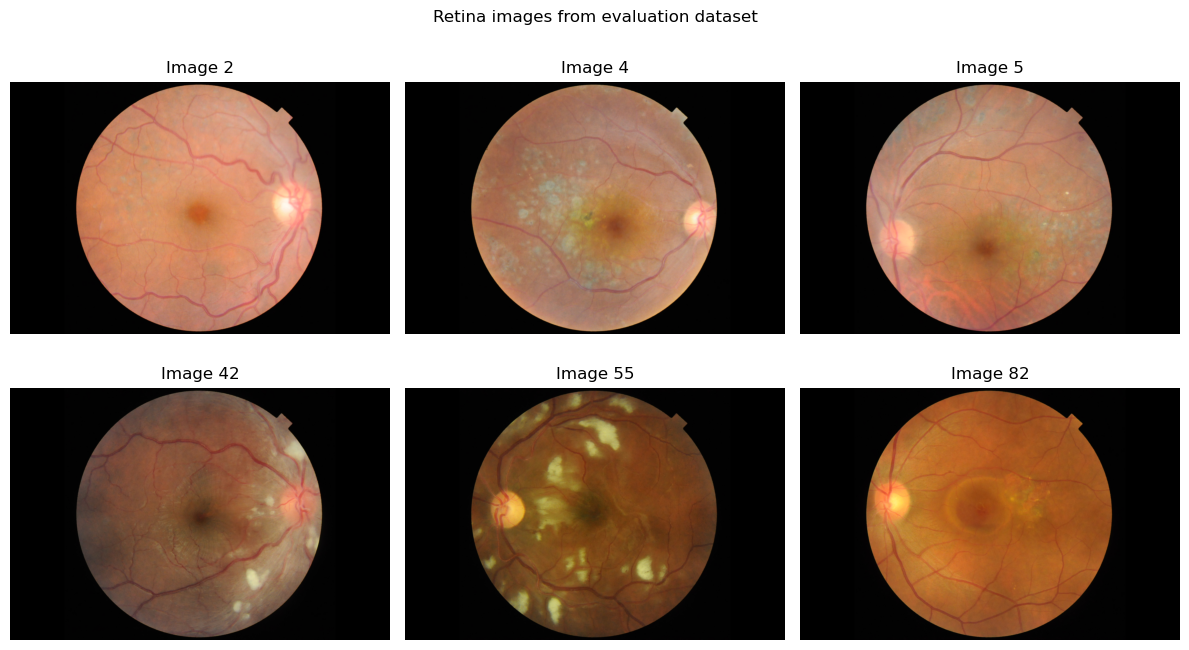

In [10]:
photo_nums = [2,4,5,42,55,82] # select photo numbers from evaluation dataset
retinas = []

# SETUP PLOT & ADD TITLE #
fig = plt.figure(figsize=(12,7),tight_layout=True)
fig.suptitle('Retina images from evaluation dataset')

for i in range(len(photo_nums)):
    
    # IMPORT PHOTOS INTO NOTEBOOK #
    retina_temp = io.imread(f'{photo_nums[i]}.png')
    retinas.append(retina_temp)
    
    # PLOT RETINA, REMOVE AXES & ADD TITLE #
    plt_retina = fig.add_subplot(2,3,i+1)
    plt_retina.imshow(retina_temp)
    plt_retina.axis('off')
    plt_retina.set_title(f'Image {photo_nums[i]}')
    
retinas = np.array(retinas) # turn standard array into numpy array for easier use

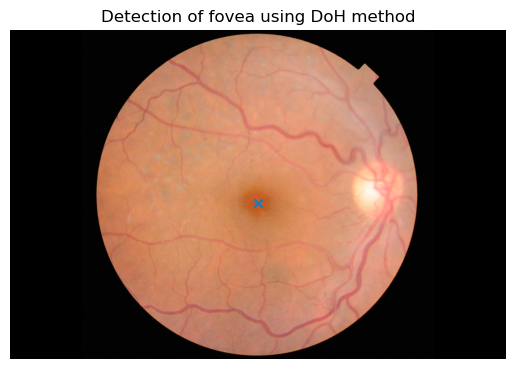

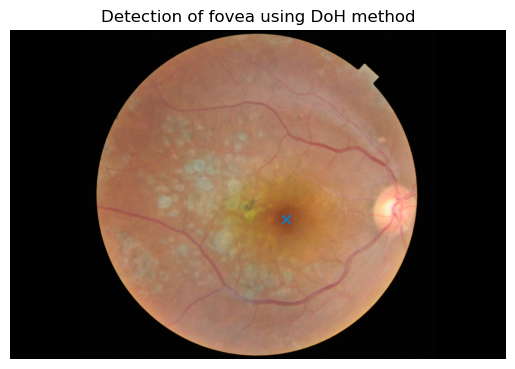

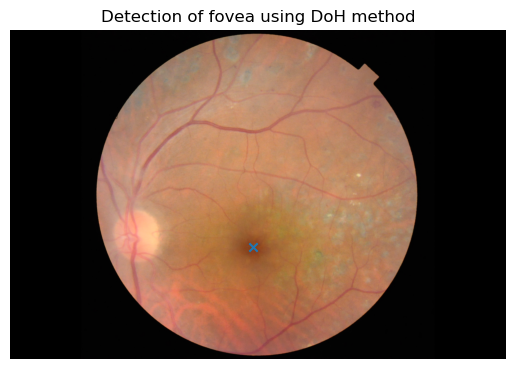

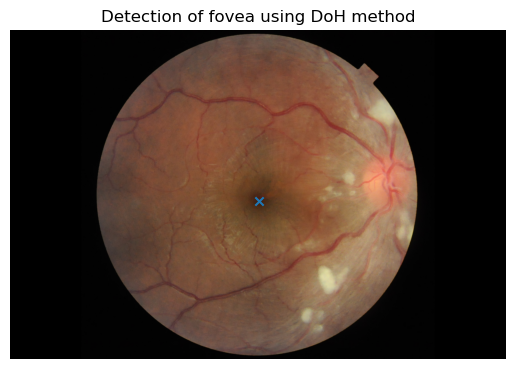

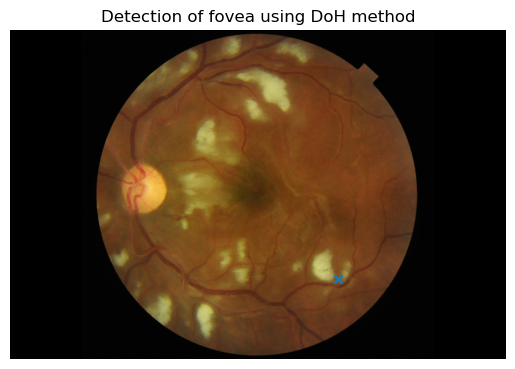

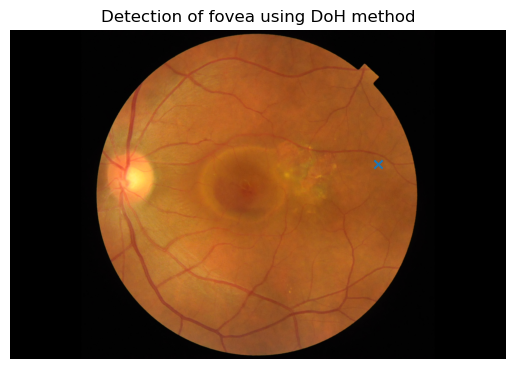

In [7]:
# PERFORM FOVEA DETECTION ON ALL SELECTED IMAGES #
for retina in retinas:
    retina_analysis = scikit_analysis(retina)
    retina_analysis.fovea_detect()

Of the six images tested, our class was successful in identifying the fovea in the first four images given. Given that the final two images were the most challenging, the class is proficent at detecting the fovea in eyes with no challanging features.